# 第4章 混合ガウスモデル
## 多峰性分布

多峰性分布とは、複数の山を持つ分布のことである。例として、イエローストーン国立公園のオールド・フェイスフル・カイザーという有名な間欠泉の噴出のデータ(縦軸:噴出の間隔、横軸:噴出の継続時間)などがある

### 多峰性分布の可視化

In [2]:
import numpy as np
import matplotlib.pyplot as plt
path = './old_faithful.txt'
xs = np.loadtxt(path)
print(xs[0])

[ 3.6 79. ]


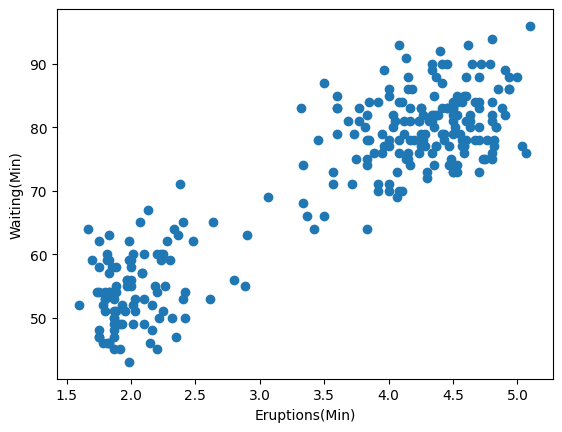

In [3]:
plt.scatter(xs[:,0], xs[:,1])
plt.xlabel('Eruptions(Min)') # 噴出した時間
plt.ylabel('Waiting(Min)') # 噴出の間隔
plt.show()

## 混合ガウスモデルのデータ生成

多峰性分布は複数の正規分布を組み合わせて表現できる。複数の正規分布からなるモデルは混合ガウスモデル(Gaussian Mixture Model)と呼ばれる。混合ガウスモデルは英語の頭文字をとってGMMとも呼ばれる

### データ生成
2つの正規分布のパラメータ(平均と分散)をmusとcovsとして用意する。これら2つの正規分布にたいして各正規分布の選ばれる確率をphisとして用意する。以下の例では1つ目の正規分布が選ばれる確率が0.35ということである。

In [4]:
mus = np.array([[2.0, 54.50], [4.3, 80.0]])
covs = np.array([[[0.07, 0.44], [0.44, 33.7]],
                 [[0.17, 0.94], [0.94, 36.0]]])
phis = np.array([0.35, 0.65])

def sample():
    z = np.random.choice(2, p=phis) # phisの確率にしたがって0,1のいずれかをサンプリング
    mu, cov = mus[z], covs[z]
    x = np.random.multivariate_normal(mu, cov) # 多次元正規分布からのサンプリング
    return x

これを用いて実際にサンプリングして散布図を描画する

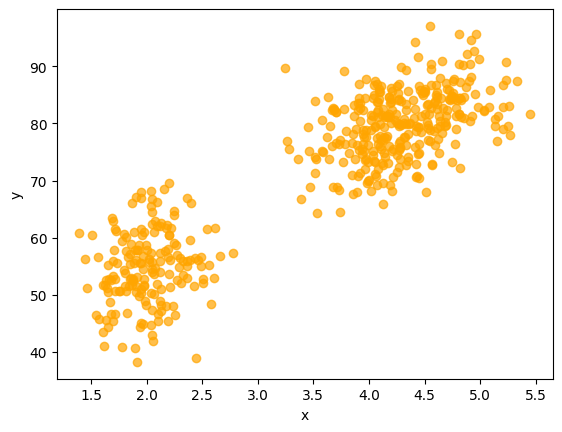

In [5]:
N = 500
xs = np.zeros((N, 2))
for i in range(N):
    xs[i] = sample()

plt.scatter(xs[:,0], xs[:,1], color='orange', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 混合ガウスモデル
### 確率の復習
確率変数$x, y$があるときに、$p\left(x, y\right)$を同時確率(Joint Probability)と呼ぶ。また、周辺確率(Marginal Probability)は$p\left(x\right)$などのような単独の確率を指す。同時確率から特定の確率変数を取り除き周辺確率を求めることを、周辺化(Marginalizetion)と呼ぶ。$y$が離散変数の場合、周辺化は
$$
p\left(x\right) = \sum_{y}{p\left(x, y\right)}
$$
とかける。$y$が連続変数の場合、
$$
p\left(x\right) = \int{p\left(x, y\right)}dy
$$
とかける。また、条件付き確率(Conditional Probability)$p\left(x|y\right)$に対して、次の乗法定理が成り立つ。
$$
p\left(x,y\right) = p\left(x|y\right)p\left(y\right)
$$

### GMMの数式
GMMは次の手順によってデータを生成する
1. K個の正規分布を用意する。
2. 以下を繰り返す
   1. K個の正規分布の中からある確率分布に従って1つを選ぶ
   2. 選んだ正規分布からデータを生成する






$K$個の正規分布の中から1つを選ぶのはカテゴリカル分布によって表される。カテゴリカル分布(Categorical Distribution)は数式では、
$$
p\left(z=k;\boldsymbol{\phi}\right) = \phi_k
$$
と表される。ここで$z$は離散型の確率変数で$1$から$K$の間の整数$k$をとる。$\boldsymbol{\phi}$はカテゴリカル分布のパラメータを表し、$\boldsymbol{\phi}=\left(\phi_1,\phi_2,\cdots,\phi_K\right)$のように$K$個の値を持ち、$k$番目のクラスが出現する確率は$\phi_k$に対応する。つまり、カテゴリカル分布は次を満たす必要がある。
$$
\begin{align}
\forall k \quad \phi_k \geq 0 \\
\sum_{k=1}^{K}{\phi_k}=1
\end{align} 
$$
続いて、複数の正規分布のパラメータを
$$\begin{align}
\boldsymbol{\mu} &= \{\boldsymbol{\mu}_1, \boldsymbol{\mu}_2, \cdots, \boldsymbol{\mu}_K\} \\
\boldsymbol{\Sigma} &= \{\boldsymbol{\Sigma}_1, \boldsymbol{\Sigma}_2, \cdots, \boldsymbol{\Sigma}_K\}
\end{align}
$$
とする。よって、$z=k$のときに確率変数$\boldsymbol{x}$の従う確率分布は
$$
p\left(\boldsymbol{x}|z=k;\boldsymbol{\mu},\boldsymbol{\Sigma}\right) = \mathcal{N}\left(\boldsymbol{x};\boldsymbol{\mu}_k,\boldsymbol{\Sigma}_k\right)
$$
となる。ここで、GMMは確率の周辺化により、
$$
p\left(\boldsymbol{x}\right) = \sum_{k=1}^{K}{p\left(\boldsymbol{x},z=k\right)}
$$
とかける。また、乗法定理より
$$
\begin{align}
p\left(\boldsymbol{x},z=k\right) &= p\left(z=k\right)p\left(\boldsymbol{x}|z=k\right)\\
&= \phi_k \mathcal{N}\left(\boldsymbol{x};\boldsymbol{\mu}_k,\boldsymbol{\Sigma}_k\right)
\end{align}
$$
とかけるため、
$$
p\left(\boldsymbol{x}\right) = \sum_{k=1}^{K}{\phi_k \mathcal{N}\left(\boldsymbol{x};\boldsymbol{\mu}_k,\boldsymbol{\Sigma}_k\right)}
$$
である。これは正規分布の重み付き和となっている。

### GMMの実装

In [6]:
mus = np.array([[2.0, 54.50], [4.3, 80.0]])
covs = np.array([[[0.07, 0.44],[0.44, 33.7]], [[0.17, 0.94], [0.94, 36.00]]])
phis = np.array([0.35, 0.65])

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y

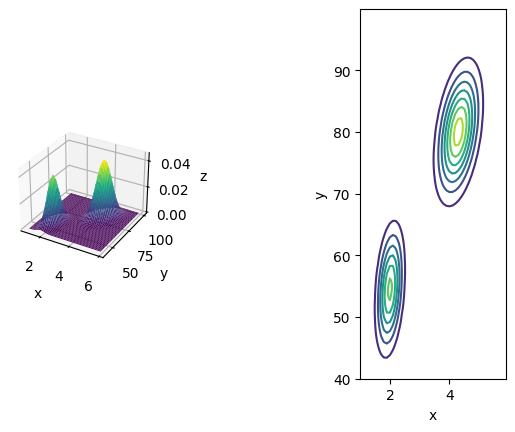

In [8]:
xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

# 2次元混合正規分布
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)

fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax2 = fig.add_subplot(1, 3, 3)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()


## GMMの最尤推定
結論から書くと、GMMのパラメータ推定のために最尤推定を使うことはできない。


サンプル$\mathcal{D}=\{\boldsymbol{x}^{\left(1\right)},\boldsymbol{x}^{\left(2\right)},\cdots,\boldsymbol{x}^{\left(N\right)}\}$が得られたときの尤度$p\left(\mathcal{D};\boldsymbol{\theta}\right)$は、
$$
\begin{align}
p\left(\mathcal{D};\boldsymbol{\theta}\right) &= p\left(\boldsymbol{x}^{\left(1\right)};\boldsymbol{\theta}\right)p\left(\boldsymbol{x}^{\left(1\right)};\boldsymbol{\theta}\right)\cdots p\left(\boldsymbol{x}^{\left(1\right)};\boldsymbol{\theta}\right)\\
&= \prod_{n=1}^{N}{p\left(\boldsymbol{x}^{\left(n\right)};\boldsymbol{\theta}\right)} 
\end{align}
$$
とかける。ここで、$\boldsymbol{\theta}=\{\boldsymbol{\phi}, \boldsymbol{\mu}, \boldsymbol{\Sigma}\}$である。

対数尤度$\log p\left(\mathcal{D};\boldsymbol{\theta}\right)$は、
$$
\begin{align}
\log p\left(\mathcal{D};\boldsymbol{\theta}\right) &= \log \prod_{n=1}^{N}{p \left(\boldsymbol{x}^{\left(n\right)};\boldsymbol{\theta}\right)} \\
&= \sum_{n=1}^{N}{\log p \left(\boldsymbol{x}^{\left(n\right)};\boldsymbol{\theta}\right)} \\
&= \sum_{n=1}^{N}{\log \left(\sum_{k=1}^{K}{\phi_k \mathcal{N}\left(\boldsymbol{x}^{\left(n\right)};\boldsymbol{\mu}_k,\boldsymbol{\Sigma}_k\right)}\right)}
\end{align}
$$
となる。

ここで最尤推定をするためには、$L\left(\boldsymbol{\theta}\right) = \log p\left(\mathcal{D}; \boldsymbol{\theta}\right)$
$$
\begin{align}
\frac{\partial L}{\partial \boldsymbol{\phi}} &= \boldsymbol{0} \\
\frac{\partial L}{\partial \boldsymbol{\mu}} &= \boldsymbol{0} \\
\frac{\partial L}{\partial \boldsymbol{\Sigma}} &= \boldsymbol{0}
\end{align}
$$
を解く必要があるが、$\log \sum$の形をしているために解析的に解けない。そこで、GMMのパラメータ推定にはEMアルゴリズムを使う必要がある。